# Problem statement

Implementation of linear regression using advertising dataset

In [1]:
pwd

'C:\\Users\\formy\\Downloads\\linear'

In [63]:
# load the necessary libraries
# import numpy as np
# import pandas as pd

# import matplotlib.pyplot as plt
# import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')



In [57]:
#load the data
data = pd.read_csv('Advertising.csv')

In [58]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Domain Analysis

1. The data speaks about the amount spent on adversiting in various sector

2. Radio, TV and Newspaper are the 3 sectors/ domain

3. target is sales, where we are trying to predict the sales done after been advertised

# Basic checks

In [59]:
#shape
data.shape
# 200 rows and 5 columns

(200, 5)

In [60]:
#'Unnamed: 0 is giving no significance for predicting the target, we are going to drop it
data.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)


In [61]:
data.shape

(200, 4)

In [8]:
data.columns
#no renaming is required here

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
data.head()
# first 5 rows in the data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
data.tail()
# last 5 rows

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [11]:
data.dtypes
# no categorical data -> no encoding required

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [12]:
data.info()
# description on the data
# no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
data.describe()
# constant columns - >std() = 0 -> drop those columns

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# EDA

Exploratory Data Analysis

1. Univarite analysis
      
         - analyse the single attribute /single column
         - here all the columns are numeric data
         - if it is a numerical col, we are going to basically check the distribution of data
         - HISTOGRAM

In [14]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Axes: xlabel='TV', ylabel='Count'>

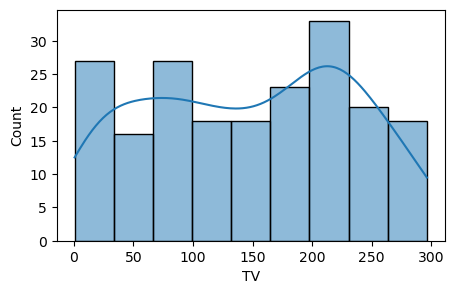

In [15]:
plt.figure(figsize=(5,3))
sns.histplot(x=data['TV'],kde=True) #KDE = kernal density estimater 

Insight : the distribution is not normal

In [16]:
#like wise you need to do it for rest of the columns and write the insight as above

<Figure size 500x300 with 0 Axes>

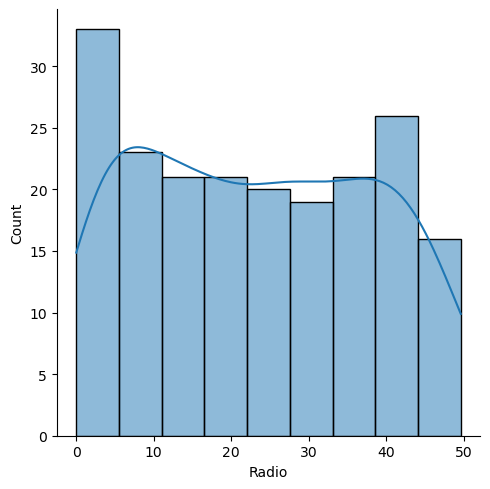

In [17]:
plt.figure(figsize=(5,3))
sns.displot(x=data["Radio"],kde=True)

Insight = Radio is not normal distributed data

<Axes: ylabel='Density'>

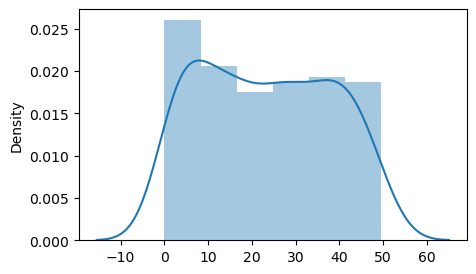

In [18]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Radio'],kde=True)

<Axes: ylabel='Density'>

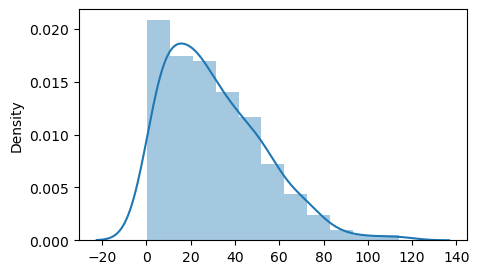

In [19]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Newspaper'],kde=True)

Insight= right side  skewness

Bivariate analysis =comaring 2 features using scattelplot we find this 

Two attributes

1. num vs num

2. num vs cat

3. always analyse the input vs target and write the insight (tip)

<Axes: xlabel='TV', ylabel='Sales'>

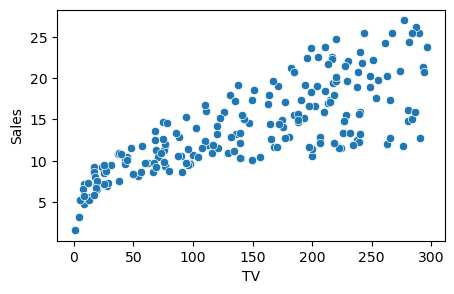

In [20]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=data, x='TV', y = 'Sales')

Insight : as the amount spent on TV advertising is increasing the sales is also getting a raise in the value

In [21]:
# follow the same for radio and newspaper

<Axes: xlabel='Radio', ylabel='Sales'>

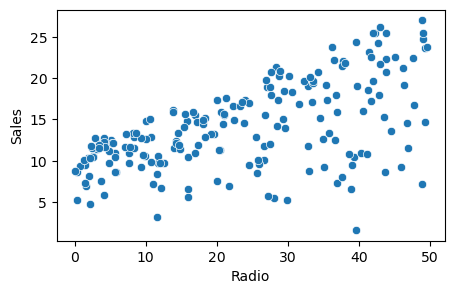

In [22]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=data, x='Radio', y = 'Sales')

insght = compare to TV is not it is increasing but not up to TV



byvarian 
multivarian 

<Axes: xlabel='Newspaper', ylabel='Sales'>

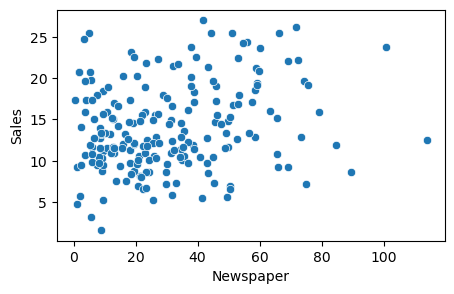

In [23]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=data, x='Newspaper', y = 'Sales')

Multi variate analysis



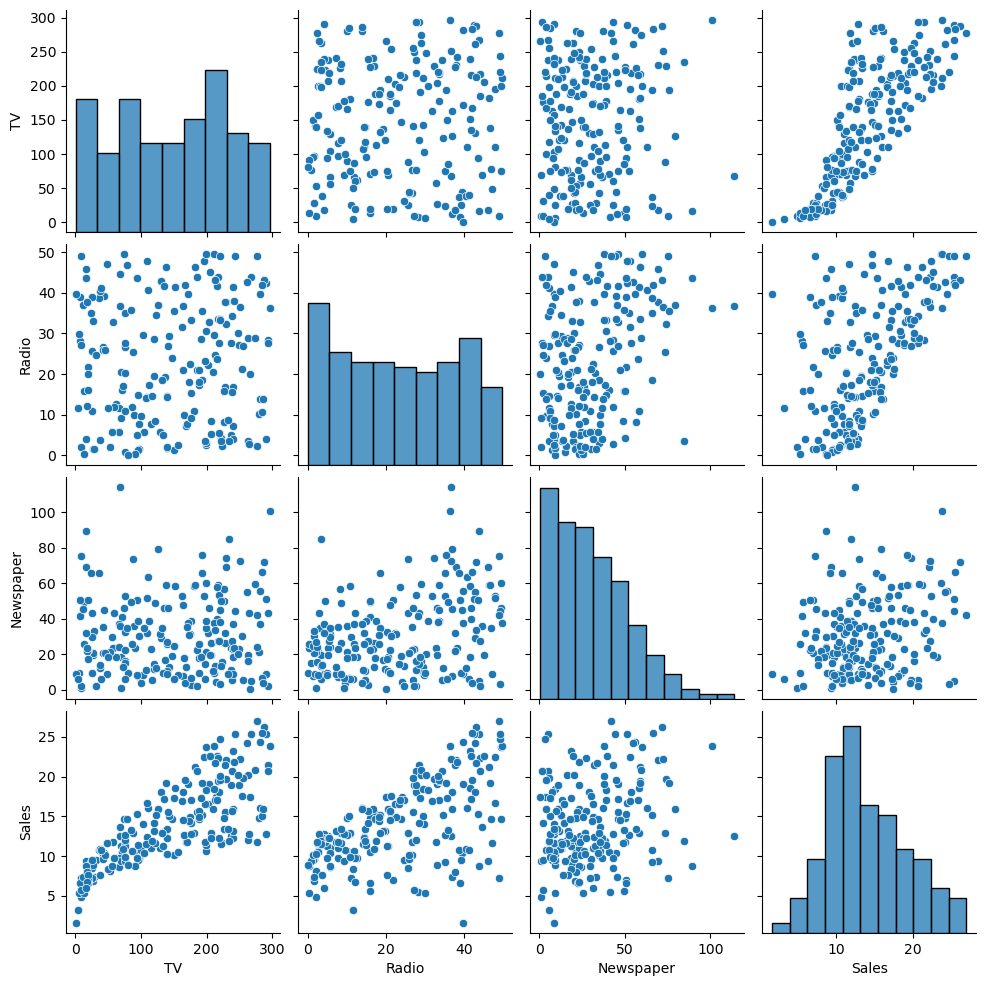

In [24]:
#pair plot
sns.pairplot(data)
# when we want to multi variance anlysis we use pair plot

insight=sales with TV is having Positive relationship

# Preprocessing of data

Cleaning the data

We need to clean and bring the data to proper format, and then push the data for traning

1. constant columns ()
2. (if we have outliers ----- we use meadian and median )

           - num - > std() =0 drop the colum 
           - cat --> unique() ==   1  (You will drop that column unique record we drop )
3. Unique  ---> drop  (include = 0 (this is catogarical ))
4. Null values
5. Duplicates = (same recored in a table  eg.TV Radio Newspaper  sales    in entire data 100 50 20 300 if all data same this is...code is == duplicate  data.duplicated.sum())
6. Transformation = ((sqr root/cube root, log root, box-cos, reciprocal log larn  This are the types of transformation) convert not normal distributed data to normal distributed  data is called transfromation) after handling null value and before handling outliers we apply transformation
7. Outliers = method IQR to count outliers 
8. Encoding -- convert catogarical data to into numerical
9. Scaling -- e.g if we have pattern like this 100 500 200 400 150 when we have this type of data model will feel dificult to learn then we make into 0 to 1 range

In [25]:
# 1. constant columns ---> std() = 0 no such col in this data
# 2. unique -----------> No such columns in the data

In [26]:
# 3. checking for null values, if the data is having null then replace with mean, median and mode
# if the data is des/ cate ---> replace the null values with mode
# if data is contiuous num and has a normla distri ---> replace the null value with meaan
# if data is contiuous num and has a skewed / not norml distri ---> replace the null value with median.
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [27]:
# 4. checking for duplicates, if present drop them , data.drop_duplicates() it remove duplicate data 
data.duplicated().sum()

0

<Axes: xlabel='Newspaper'>

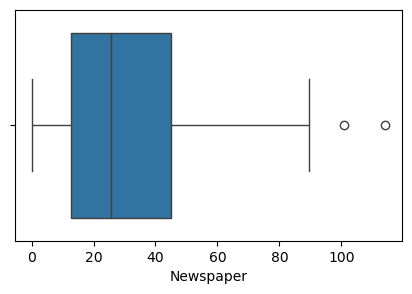

In [28]:
 # 5. outlier detection   for checking outliers we use box plot
plt.figure(figsize=(5,3))
sns.boxplot(x=data['Newspaper'])

insight = this is right skewnsess and here right  Q3-Q1 is IQR formula  and uper limit lower limit UL= Q3  # LOWER   q1 - 1.5*iqr
 UPPER   q3 + 1.5 * iqr

<Axes: xlabel='TV'>

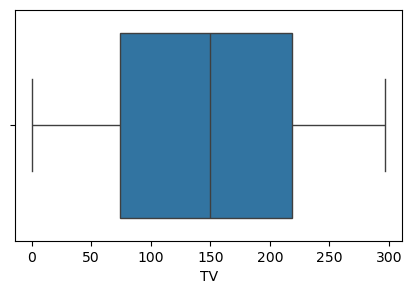

In [29]:
plt.figure(figsize=(5,3))
sns.boxplot(x=data['TV'])

<Axes: ylabel='Density'>

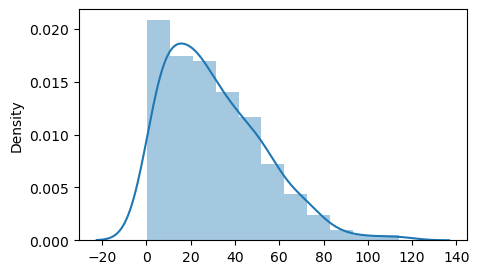

In [30]:
#we will handle the outliers,
#1. distrubtion

plt.figure(figsize=(5,3))
sns.distplot(x=data['Newspaper'])

In [31]:
#the distribution is not normal, skewed distribution
# We will handle the outlier by IQR method
# Q1, Q3
# IQR
# LOWER   q1 - 1.5*iqr
# UPPER   q3 + 1.5 * iqr

In [32]:
q1 = data['Newspaper'].quantile(0.25) 
q1

12.75

In [33]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [34]:
q3 = data['Newspaper'].quantile(0.75)
q3

45.1

In [35]:
iqr = q3 - q1
iqr

32.35

In [36]:
lower = q1 - 1.5 * iqr
lower 

-35.775000000000006

In [37]:
upper  = q3 + 1.5 * iqr
upper 

93.625

In [38]:
data.loc[data['Newspaper']<lower]   # loc = location

,TV,Radio,Newspaper,Sales


In [39]:
data.loc[data['Newspaper']>upper]  #this is outliers


,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [40]:
#% of outlier
# if % of outlier is 5 or below 5 then only handle 
# if % of outlier is > than 5 10,20 dont do anything
len(data.loc[data['Newspaper']>upper])

2

In [41]:
len(data)

200

In [42]:
(len(data.loc[data['Newspaper']>upper])/len(data))*100

1.0

In [43]:
data['Newspaper'].median()

25.75

In [44]:
data.loc[data['Newspaper']>upper,'Newspaper']  = data['Newspaper'].median()

<Axes: xlabel='Newspaper'>

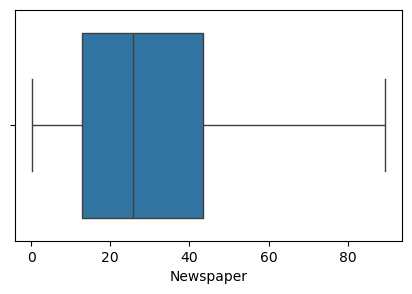

In [45]:
plt.figure(figsize=(5,3))
sns.boxplot(x=data['Newspaper'])

In [46]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [47]:
# Encoding
# Scaling is skipped here

# Feature engineering / Feature selection

We are going to select the important features from the data, for the model to get trained


1. drop the irrelevant columns

2. heatmap and check the co relation values

In [48]:
#drop the irrelevant columns

<Axes: >

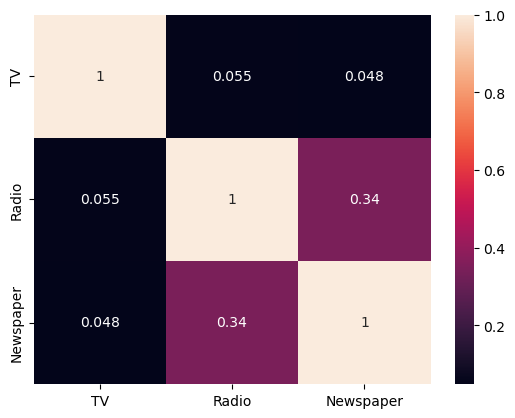

In [49]:
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True)  # corr between indipented featurs

In [50]:
#no column is dropped all are retained for the model to learn on it

# Model buidling

In [51]:
# divide the data into input and target
x = data.drop('Sales',axis=1)  # Input  :TV Radio NewsPaper
y = data['Sales']              #Target : Sales



In [52]:
# divide the x and y into training data and testing data
# 100 % data will be there

# training  maximumn data will be sent for model to train, 70%, 75%, 80%
# testing  minim data that is 20%, 25%,30 % will be sent for testing , new record for the model
        # it is a total unseen record for the model

In [53]:
#sklearn , it is a scientific library  which has all the functionalities of ML
from sklearn.model_selection import train_test_split
# we should follow order First X and Y 
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.30,random_state = 3)  #80% for training 20% for testing  we should some data to model perfomance 
X_test = TV, Radio , Newspaper

NameError: name 'TV' is not defined

In [ ]:
x.shape

In [ ]:
x_train.shape  # went for training 

In [ ]:
x_test.shape # went for testing

# Algorithm

In [ ]:
# import the algorithm
from sklearn.linear_model import LinearRegression

#initialise it
model = LinearRegression()

#train the model
model.fit(x_train, y_train) #fit is apply for your further data it will apply all data in X train and Y train 

In [ ]:
# we trained the model
# we need to test the model for the performance
# y_pred
# for tetsing the model, we need to send the model with unseen records, x_test

In [ ]:
y_pred = model.predict(x_test)  # test darta

In [ ]:
y_pred

In [ ]:
y_test  # actual data

In [ ]:
y_test.shape

In [ ]:
# slopes # 3 slope values are given?
# m1 x1 + m2 x2 + m3 x3 + C = y # since we have 3 input values 3 slopes#
model.coef_ #m1 m2 m3 

In [ ]:
#intercept
model.intercept_ #c value

In [ ]:
#user defined values for the prediction
# TV 100 , Radio 70 Newspaper = 20
model.predict([[100,70,20]]) #x1 x2 x3 : TV radio Newspaper

In [ ]:
# Erros / loss functions
# Error = Actual - predicted value
# MSE
# MAE
# RMSE
# takes 2 parameters y_test, y_pred

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   #metrics: Evaluation metrix 

In [ ]:
mse = mean_squared_error(y_test,y_pred) # y_test Actual data , Y_pred : testing 
mse

In [ ]:
mae = mean_absolute_error(y_test,y_pred)  #Root 
mae

In [ ]:
rmse = np.sqrt(mse) 
rmse

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
# 88% is the r2 score
# this signifies, the over all perfomance of the model is good
# 87% of the records are predicted correctly
# 12% of data is predicted wrong

In [269]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
